<a href="https://www.kaggle.com/code/anujadeepakshinde/housepriceprediction?scriptVersionId=107805808" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
house = pd.read_csv('../input/housedata/data.csv')
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
house.nunique(axis = 0)   

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [5]:
house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [8]:
house['date'] = pd.to_datetime(house['date'])

In [9]:
house['date'].dt.year

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
4595    2014
4596    2014
4597    2014
4598    2014
4599    2014
Name: date, Length: 4600, dtype: int64

In [10]:
house['year'] = house['date'].dt.year
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014


In [11]:
(house['price'] == 0).sum(0)

49

In [12]:
house[house['price'] == 0].shape

(49, 19)

In [13]:
house['price'].replace(0, np.nan, inplace = True)
house.isnull().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
year              0
dtype: int64

In [14]:
house['price'].fillna(value = house['price'].mean(), inplace = True)
house.isnull().sum().sum()

0

In [15]:
house1 = house.drop(['date', 'street', 'statezip', 'country', 'city'], axis = 1)

In [16]:
house1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,557905.899138,560917.633712,7800.0,328158.928572,468750.00,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.000000,3.00,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.750000,2.25,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.000000,1980.00,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.750000,7683.00,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.000000,1.50,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.000000,0.00,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.000000,0.00,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.000000,3.00,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.000000,1590.00,2300.00,9410.0


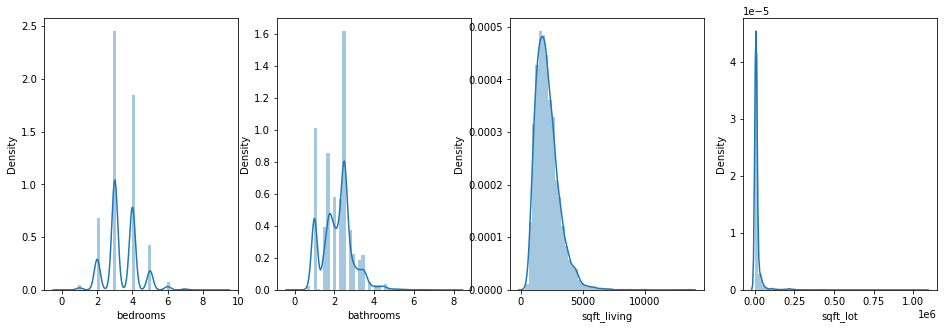

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (16, 5))
plt.subplot(1,4,1)
sns.distplot(house1['bedrooms'])
plt.subplot(1,4,2)
sns.distplot(house1['bathrooms'])
plt.subplot(1,4,3)
sns.distplot(house1['sqft_living'])
plt.subplot(1,4,4)
sns.distplot(house1['sqft_lot'])
plt.show()

In [18]:
def replace_outliers_with_nan_iqr(house1, feature, inplace = False):
    desired_feature = house1[feature]
    
    q1, q3 = desired_feature.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    indices = (desired_feature[(desired_feature > upper_bound) | (desired_feature < lower_bound)]).index
    if not inplace:
        return desired_feature.replace(desired_feature[indices].values, np.nan)
    return desired_feature.replace(desired_feature[indices].values, np.nan, inplace=True)

In [19]:
replace_outliers_with_nan_iqr(house1, 'price', inplace = True)
house1.price.isnull().sum()

249

In [20]:
house1.fillna(value = house1['price'].mean(), inplace = True)
house1.isnull().sum().sum()

0

In [21]:
replace_outliers_with_nan_iqr(house1, 'sqft_basement', inplace = True)

house1['sqft_basement'].fillna(value = house1['sqft_basement'].mean(), inplace = True)
house1.isnull().sum().sum()

0

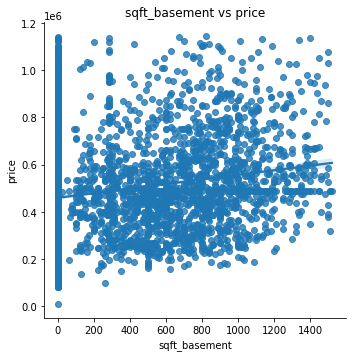

In [22]:
ax = sns.lmplot(data = house1, x = 'sqft_basement', y = 'price')
ax.set(title = 'sqft_basement vs price')

In [23]:
replace_outliers_with_nan_iqr(house1, 'sqft_above', inplace = True)

house1['sqft_above'].fillna(value = house1['sqft_above'].mean(), inplace = True)
house1.isnull().sum().sum()

0

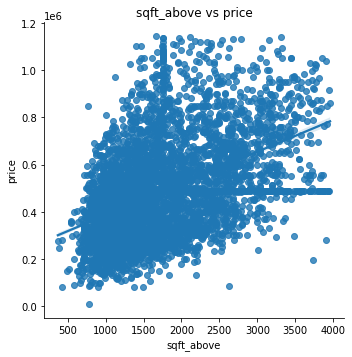

In [24]:
ax = sns.lmplot(data = house1, x = 'sqft_above', y = 'price')
ax.set(title = 'sqft_above vs price')

<AxesSubplot:xlabel='price', ylabel='Density'>

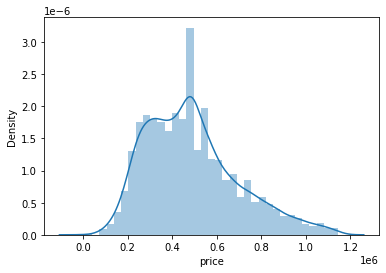

In [25]:
sns.distplot(house1['price'])

In [26]:
import plotly.express as px

year_trend = pd.concat([house1['price'], house1['yr_built']], axis = 1)
fig = px.scatter(house1, x = 'yr_built', y = 'price', title = 'Price vs Year Built', labels = dict(price = "Price ", yr_built = "Year built "))
fig.update_layout(yaxis_range = [0 , 4000000], width = 800, height = 600)
fig.show()  

In [27]:
sqft_trend = pd.concat([house1['price'], house1['sqft_living']], axis = 1)
fig = px.scatter(house1, x = 'sqft_living', y = 'price', title = 'Price vs Living Area', labels = dict(price = "Price ", sqft_living = "Sqft "))
fig.update_layout(yaxis_range = [0 , 4000000], xaxis_range = [0 , 8000], width = 800, height = 600)
fig.show()

In [28]:
def draw_boxplot(feature):
    sns.set_style('whitegrid')
    ax = sns.boxplot(x = house1[feature], y = np.log(house1['price']))
    ax.set_ylabel('price (log)')
    ax.set(title = f'{feature} VS price')

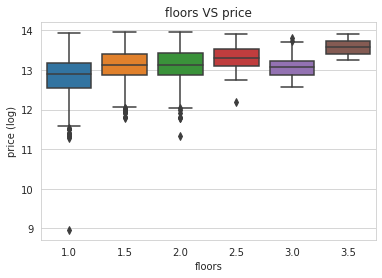

In [29]:
draw_boxplot('floors')

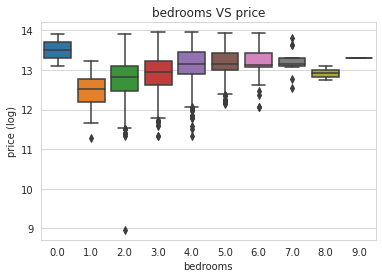

In [30]:
draw_boxplot('bedrooms')

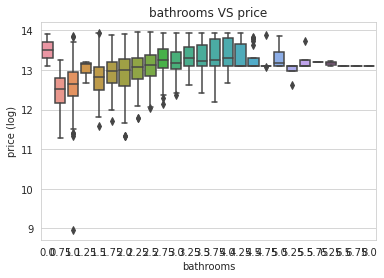

In [31]:
draw_boxplot('bathrooms')

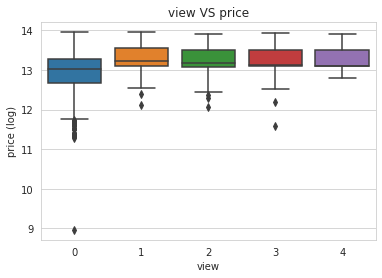

In [32]:
draw_boxplot('view')

In [33]:
fig = px.box(house1, y = "price", x = "waterfront",)
fig.update_layout(yaxis_range = [0 , 2000000], width = 800, height = 600)
fig.show()

In [34]:
year_ren_trend = pd.concat([house1['price'], house1['yr_renovated']], axis = 1)
fig = px.scatter(house1, x = 'yr_renovated', y = 'price', title = 'Price vs Year renovated', labels = dict(price = "Price ", yr_renovated = "Year "))
fig.update_layout(yaxis_range=[0 , 2000000], xaxis_range = [1912 , 2018], width = 800, height = 600)
fig.show()

In [35]:
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   float64
 10  sqft_basement  4600 non-null   float64
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  year           4600 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 503.2 KB


In [36]:
house1.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
house1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year
price,1.000000,0.291655,0.422480,0.510498,0.091087,0.266329,0.045479,0.181319,0.048298,0.468932,0.191012,0.056706,-0.068266,NaN
bedrooms,0.291655,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.460774,0.280241,0.142461,-0.061082,NaN
bathrooms,0.422480,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.597445,0.205283,0.463498,-0.215886,NaN
sqft_living,0.510498,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.706465,0.294995,0.287775,-0.122817,NaN
sqft_lot,0.091087,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.137959,-0.007777,0.050706,-0.022730,NaN
floors,0.266329,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.532653,-0.274430,0.467481,-0.233996,NaN
waterfront,0.045479,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.042397,0.045447,-0.023563,0.008625,NaN
view,0.181319,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.139097,0.232825,-0.064465,0.022967,NaN
condition,0.048298,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.177349,0.218895,-0.399698,-0.186818,NaN
sqft_above,0.468932,0.460774,0.597445,0.706465,0.137959,0.532653,0.042397,0.139097,-0.177349,1.000000,-0.150092,0.414554,-0.163699,NaN


<AxesSubplot:>

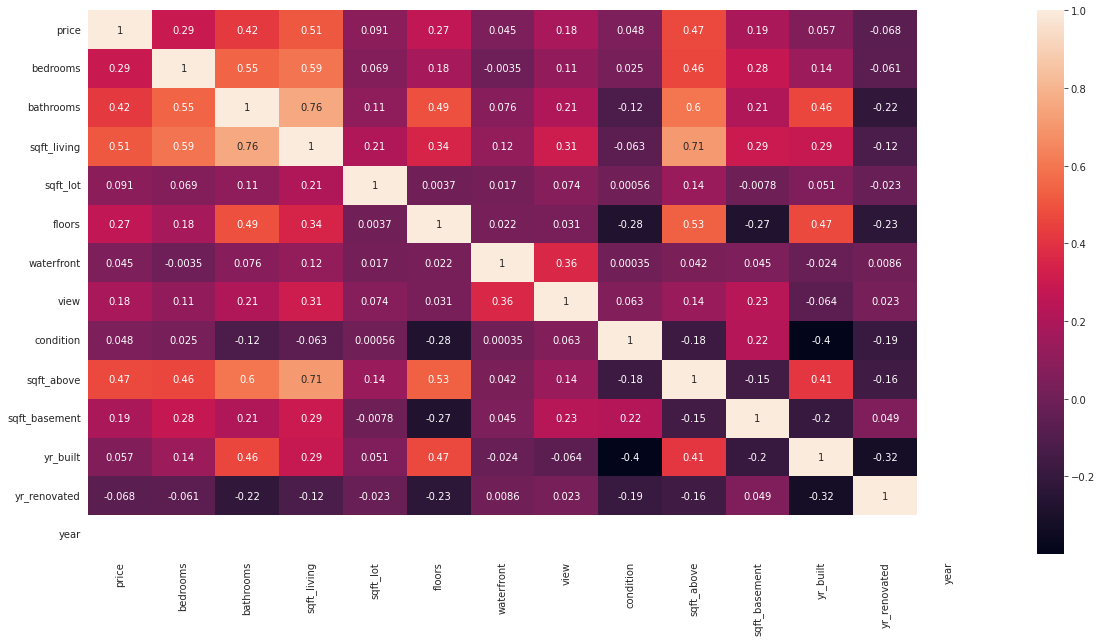

In [38]:
plt.figure(figsize = (20, 10))
sns.heatmap(house1.corr(), annot = True)

In [39]:
x = house1.drop('price', axis = 1)
y = house1['price']

In [40]:
from sklearn.feature_selection import mutual_info_regression

def get_mi_score(x, y):
    mi = mutual_info_regression(x, y, random_state = 10)
    mi = pd.Series(mi, index = x.columns).sort_values(ascending = False)
    return mi

In [41]:
mi_score = get_mi_score(x, y)
mi_score

sqft_living      0.312164
sqft_above       0.223771
bathrooms        0.177888
yr_built         0.085256
sqft_lot         0.082656
view             0.067964
bedrooms         0.067502
floors           0.056619
sqft_basement    0.054973
condition        0.012651
waterfront       0.008716
yr_renovated     0.000000
year             0.000000
dtype: float64

In [42]:
x.drop(['yr_renovated', 'condition', 'waterfront'], axis = 1, inplace = True)

In [43]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,year
0,3.0,1.50,1340,7912,1.5,0,1340.0,0.0,1955,2014
1,5.0,2.50,3650,9050,2.0,4,3370.0,280.0,1921,2014
2,3.0,2.00,1930,11947,1.0,0,1930.0,0.0,1966,2014
3,3.0,2.25,2000,8030,1.0,0,1000.0,1000.0,1963,2014
4,4.0,2.50,1940,10500,1.0,0,1140.0,800.0,1976,2014


In [44]:
y

0       313000.000000
1       486880.048993
2       342000.000000
3       420000.000000
4       550000.000000
            ...      
4595    308166.666667
4596    534333.333333
4597    416904.166667
4598    203400.000000
4599    220600.000000
Name: price, Length: 4600, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 20)

In [46]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
house1 = pd.DataFrame(scaler.fit_transform(house1[['price']]))
house1.columns = ['price']

In [47]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, x, y, scoring = "neg_mean_squared_error", cv = 5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [48]:
models = pd.DataFrame(columns = ["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
predictions = lin_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index = True)

MAE: 133741.62626771262
MSE: 28620196949.52161
RMSE: 169175.04824743397
R2 Score: 0.3373454456546181
------------------------------
RMSE Cross-Validation: 168732.31562740798


In [50]:
ridge = Ridge()
ridge.fit(x_train, y_train)
predictions = ridge.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index = True)

MAE: 133742.36818533868
MSE: 28619790095.889595
RMSE: 169173.8457796878
R2 Score: 0.337354865695042
------------------------------
RMSE Cross-Validation: 168731.99238545136


In [51]:
lasso = Lasso()
lasso.fit(x_train, y_train)
predictions = lasso.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index = True)

MAE: 133741.7466540965
MSE: 28620159639.520885
RMSE: 169174.93797699732
R2 Score: 0.33734630950757993
------------------------------
RMSE Cross-Validation: 168732.25893166117


In [52]:
elastic_net = ElasticNet()
elastic_net.fit(x_train, y_train)
predictions = elastic_net.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index = True)

MAE: 135116.32522043382
MSE: 28794144177.48552
RMSE: 169688.37372514806
R2 Score: 0.3333179778133122
------------------------------
RMSE Cross-Validation: 169662.33946817095


In [53]:
svr = SVR(C = 400000)
svr.fit(x_train, y_train)
predictions = svr.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index = True)

MAE: 137450.28746358078
MSE: 30808389459.81173
RMSE: 175523.18781235637
R2 Score: 0.28668137317162146
------------------------------
RMSE Cross-Validation: 173486.95233496005


In [54]:
random_forest = RandomForestRegressor(n_estimators = 100)
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index = True)

MAE: 126288.87788141299
MSE: 26858306455.67785
RMSE: 163885.04036573274
R2 Score: 0.37813918170271743
------------------------------
RMSE Cross-Validation: 158724.9588524268


In [55]:
xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.01)
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index = True)

MAE: 123782.16221456484
MSE: 26193837857.000023
RMSE: 161845.10451972287
R2 Score: 0.3935238816721114
------------------------------
RMSE Cross-Validation: 156218.44426932224


In [56]:
poly_reg = PolynomialFeatures(degree = 2)
x_train_2d = poly_reg.fit_transform(x_train)
x_test_2d = poly_reg.transform(x_test)

lin_reg = LinearRegression()
lin_reg.fit(x_train_2d, y_train)
predictions = lin_reg.predict(x_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree = 2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index = True)

MAE: 131496.89993167523
MSE: 29908367581.958397
RMSE: 172940.35845330724
R2 Score: 0.30751992985318066
------------------------------
RMSE Cross-Validation: 168732.31562740798


In [57]:
models.sort_values(by = "RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGBRegressor,123782.162215,2.619384e+10,161845.104520,0.393524,156218.444269
5,RandomForestRegressor,126288.877881,2.685831e+10,163885.040366,0.378139,158724.958852
1,Ridge,133742.368185,2.861979e+10,169173.845780,0.337355,168731.992385
2,Lasso,133741.746654,2.862016e+10,169174.937977,0.337346,168732.258932
0,LinearRegression,133741.626268,2.862020e+10,169175.048247,0.337345,168732.315627
7,Polynomial Regression (degree = 2),131496.899932,2.990837e+10,172940.358453,0.307520,168732.315627
3,ElasticNet,135116.325220,2.879414e+10,169688.373725,0.333318,169662.339468
4,SVR,137450.287464,3.080839e+10,175523.187812,0.286681,173486.952335


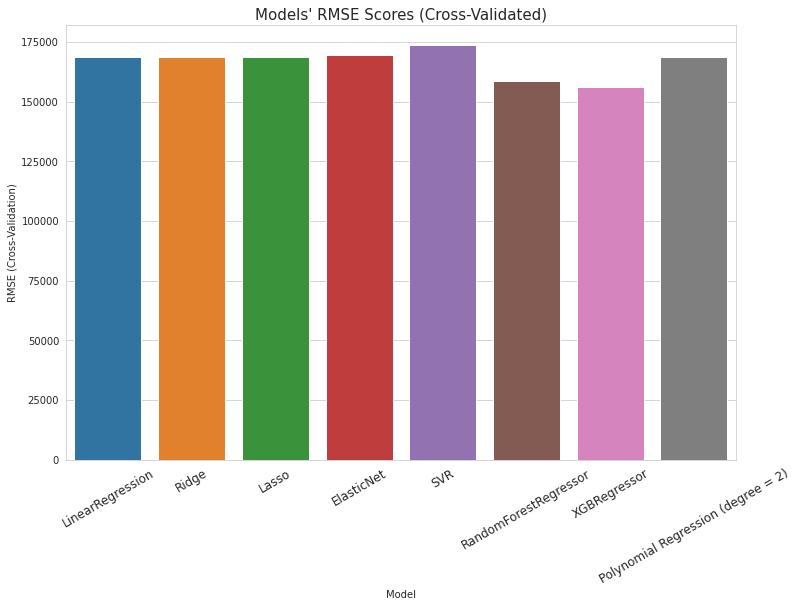

In [58]:
plt.figure(figsize = (12, 8))
sns.barplot(x = models["Model"], y = models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size = 15)
plt.xticks(rotation = 30, size = 12)
plt.show()